In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
#import corner
import pandas as pd

array([<AxesSubplot:xlabel='traceID'>, <AxesSubplot:xlabel='traceID'>,
       <AxesSubplot:xlabel='traceID'>, <AxesSubplot:xlabel='traceID'>,
       <AxesSubplot:xlabel='traceID'>, <AxesSubplot:xlabel='traceID'>,
       <AxesSubplot:xlabel='traceID'>, <AxesSubplot:xlabel='traceID'>,
       <AxesSubplot:xlabel='traceID'>, <AxesSubplot:xlabel='traceID'>,
       <AxesSubplot:xlabel='traceID'>, <AxesSubplot:xlabel='traceID'>],
      dtype=object)

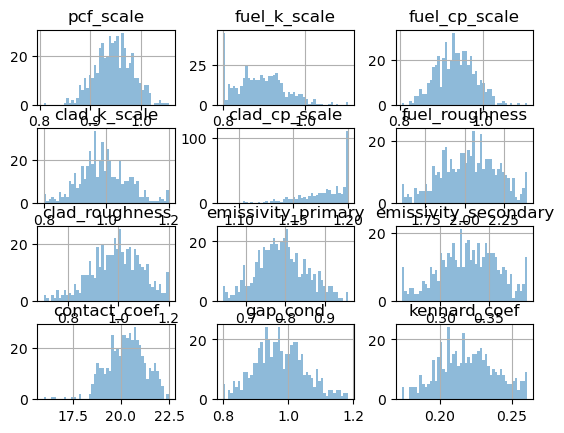

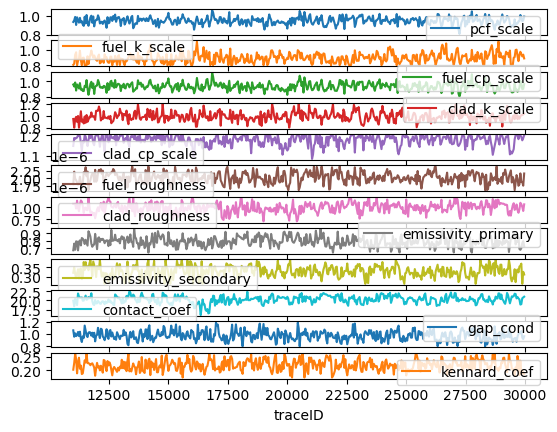

In [2]:
fname = 'dumpExport.csv'
### thining of the chain
interval = 40
### load data
df = pd.read_csv(fname, index_col='traceID')
index = df.index
x = range(index[10000], index[-1], interval)
df = df.loc[x]
### Histgram plot
df.hist(alpha=0.5, bins=50)
### trace plot
df.plot(subplots=True)

In [25]:
def plot_data(x, y1, mean, y2, param):
    fig,ax = plt.subplots(figsize=(13,7),constrained_layout=True)
    ax.hist(y2, bins=50, ec="yellow", fc="green", label='Calibrated', density=True)
    ax.axvline(x=np.mean(y2), color='b', label=f'Calibrated mean: {round(np.mean(y2), 4)}')
    ax.plot(x, y1,'r',label='Prior')
    ax.axvline(x=mean, color='r', label=f'Prior mean: {mean}')
    # ax.set_xlabel('Time [s]')
    ax.set_ylabel(param)
    fig.suptitle(param+' distribution')
    ax.legend()

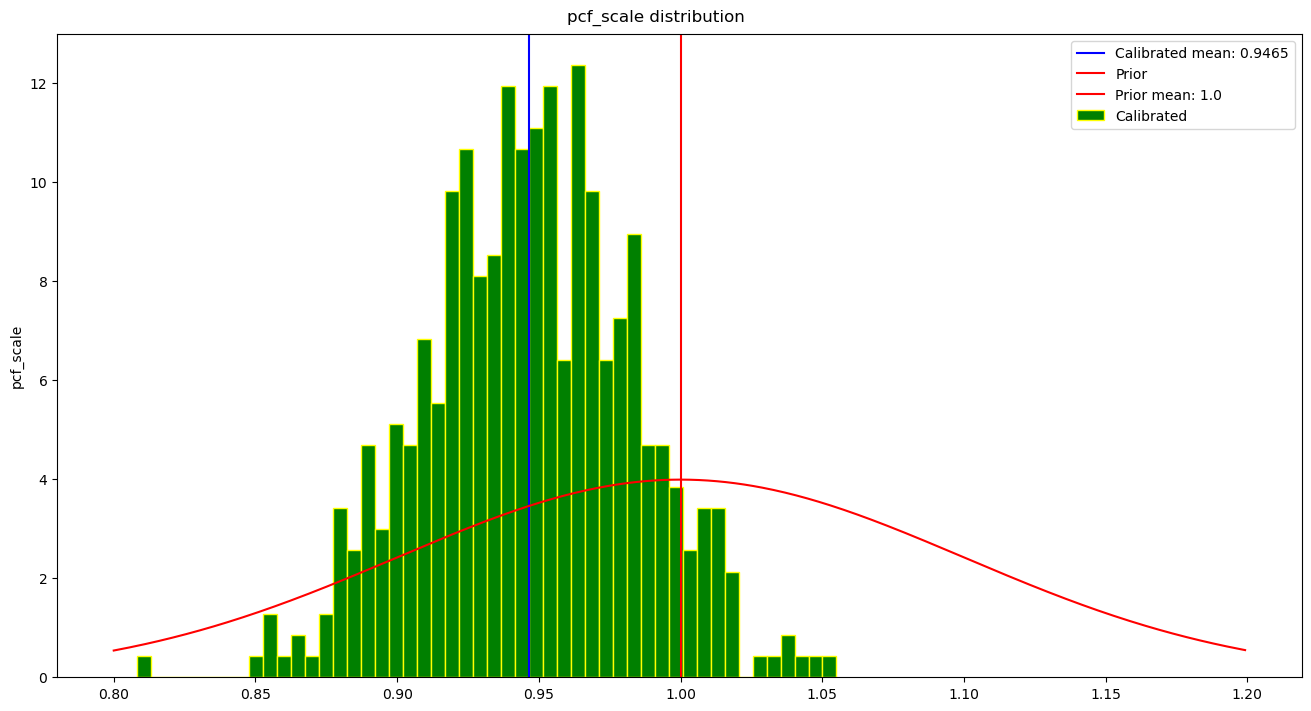

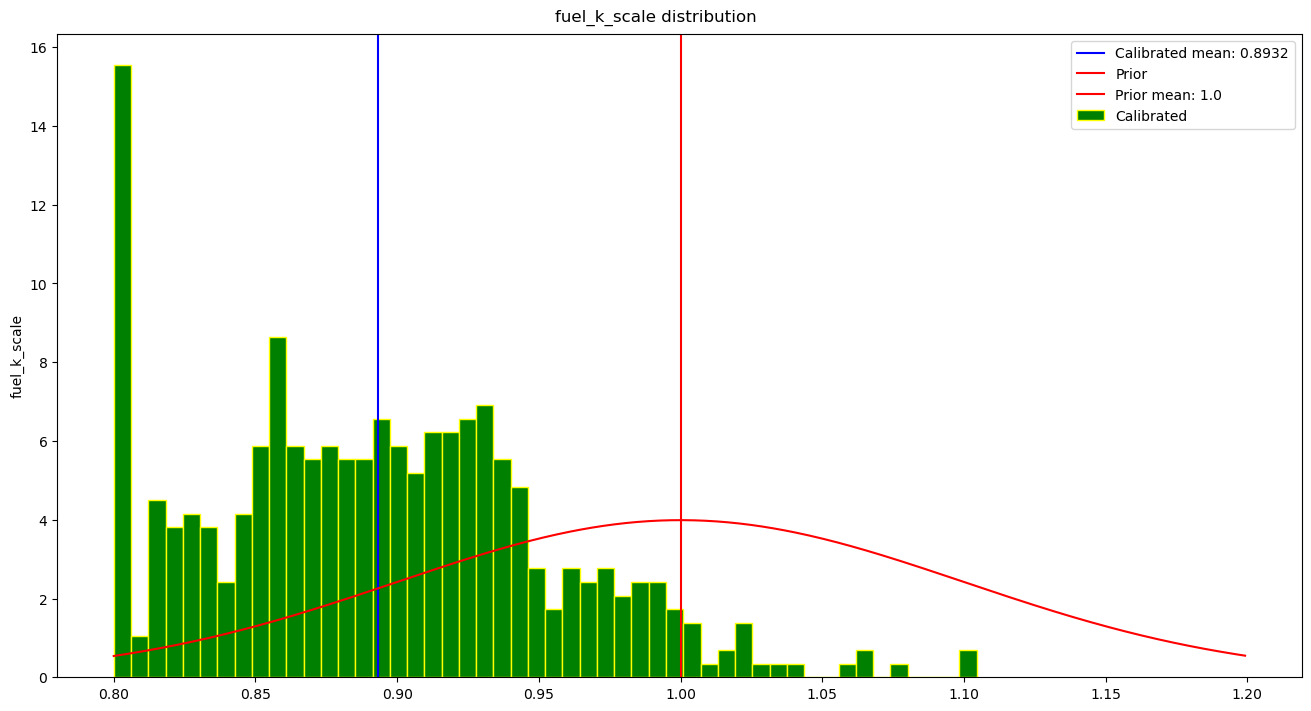

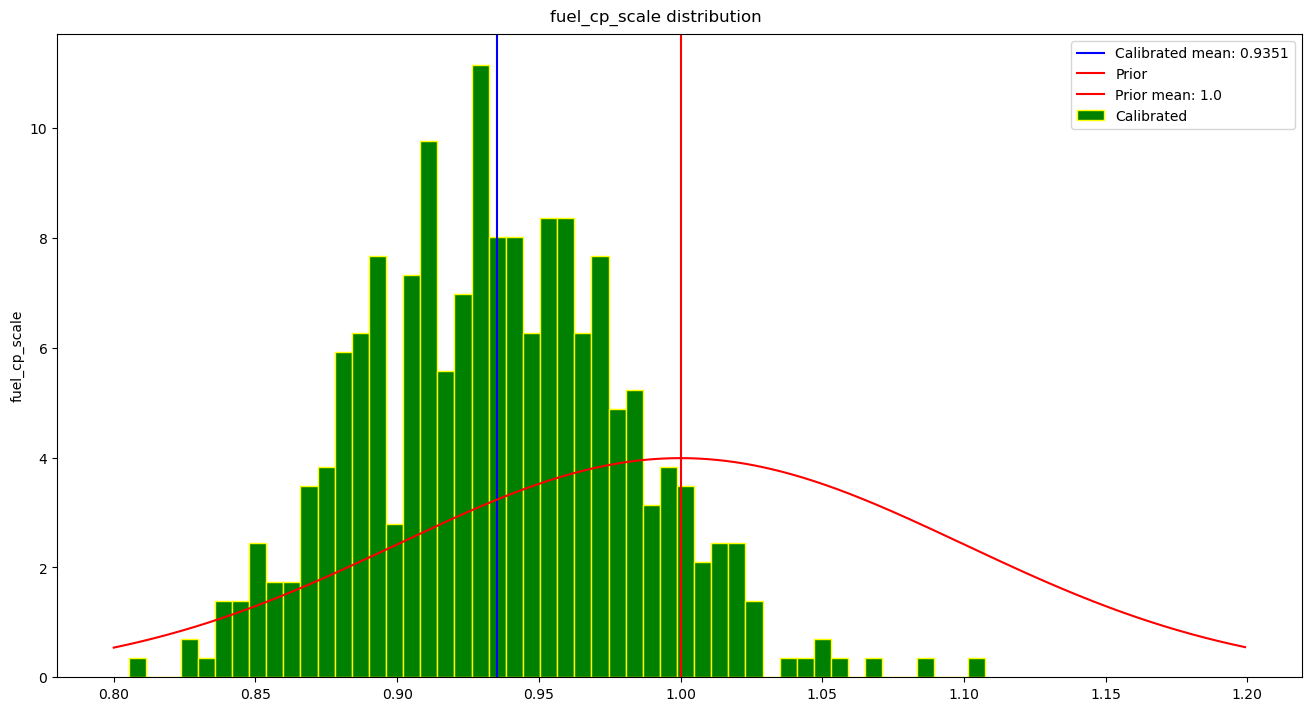

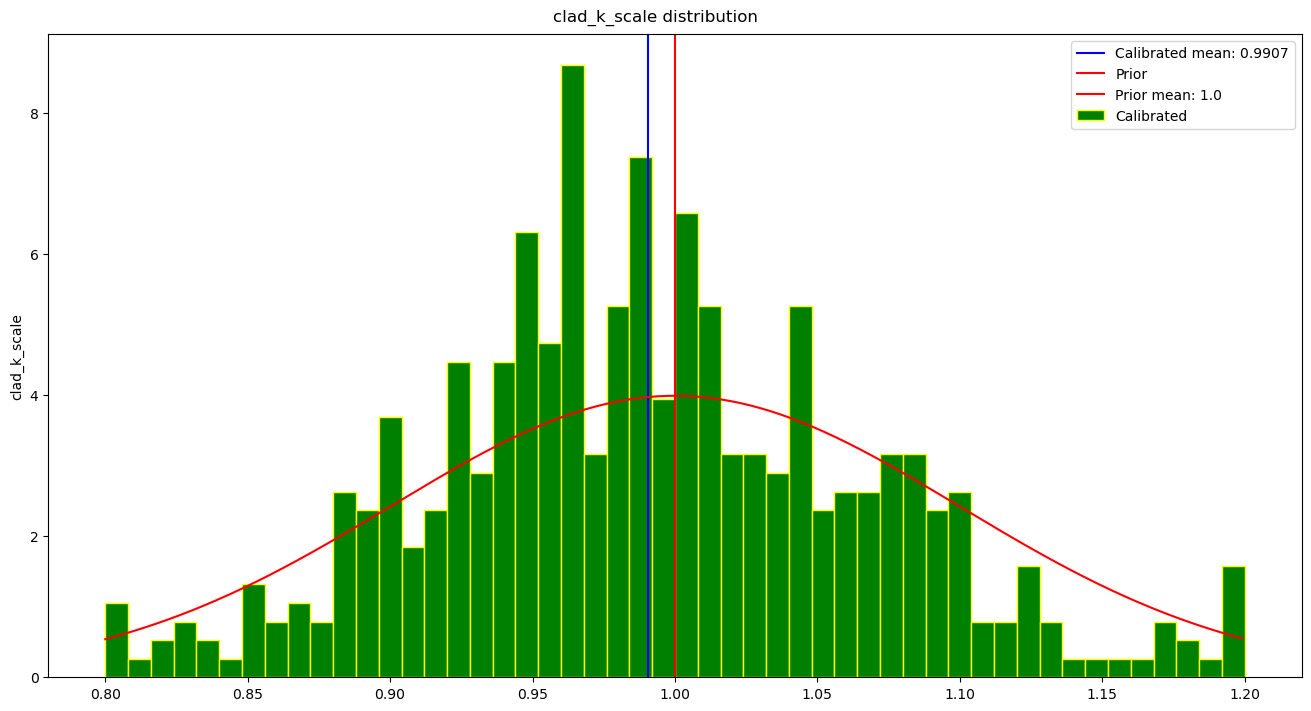

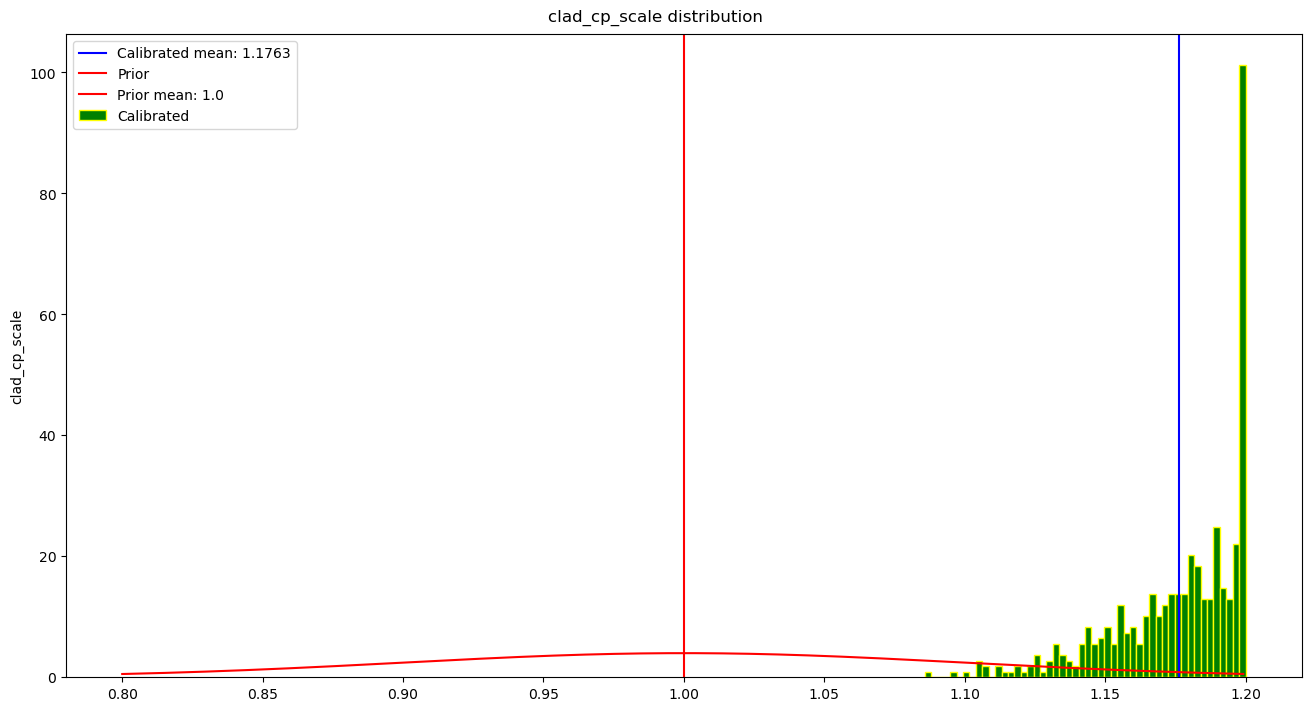

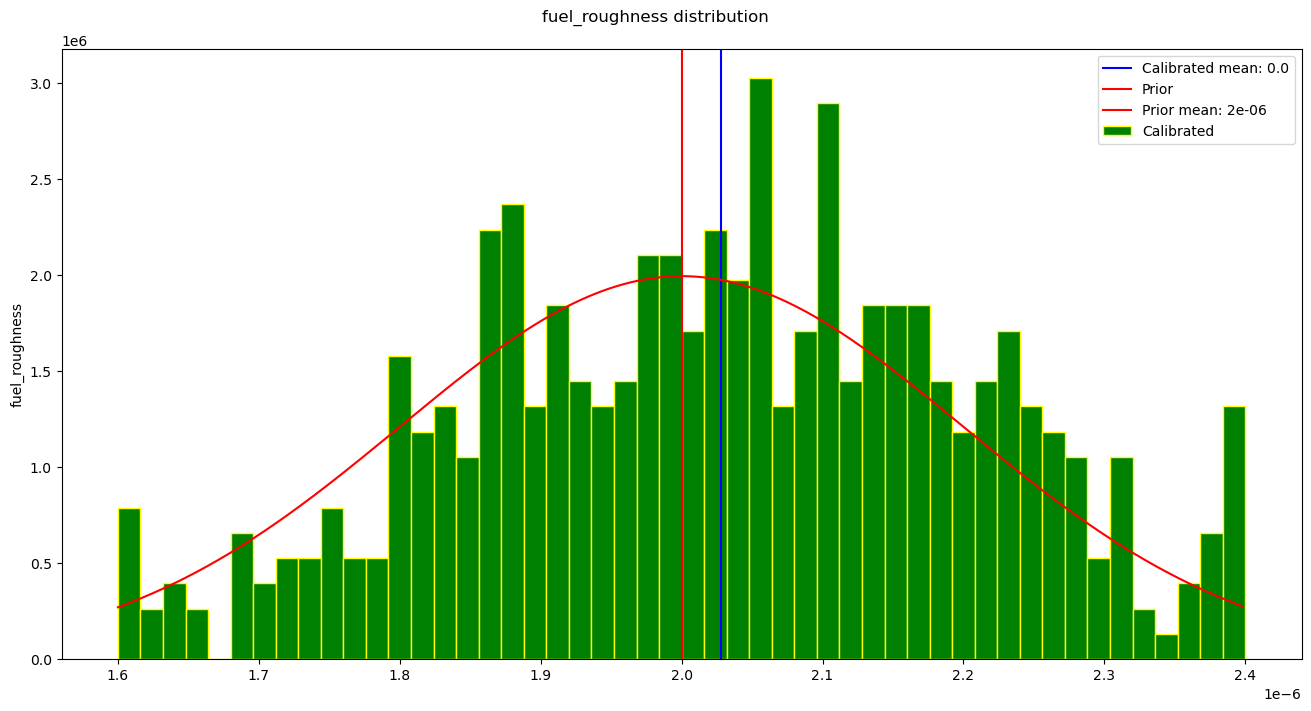

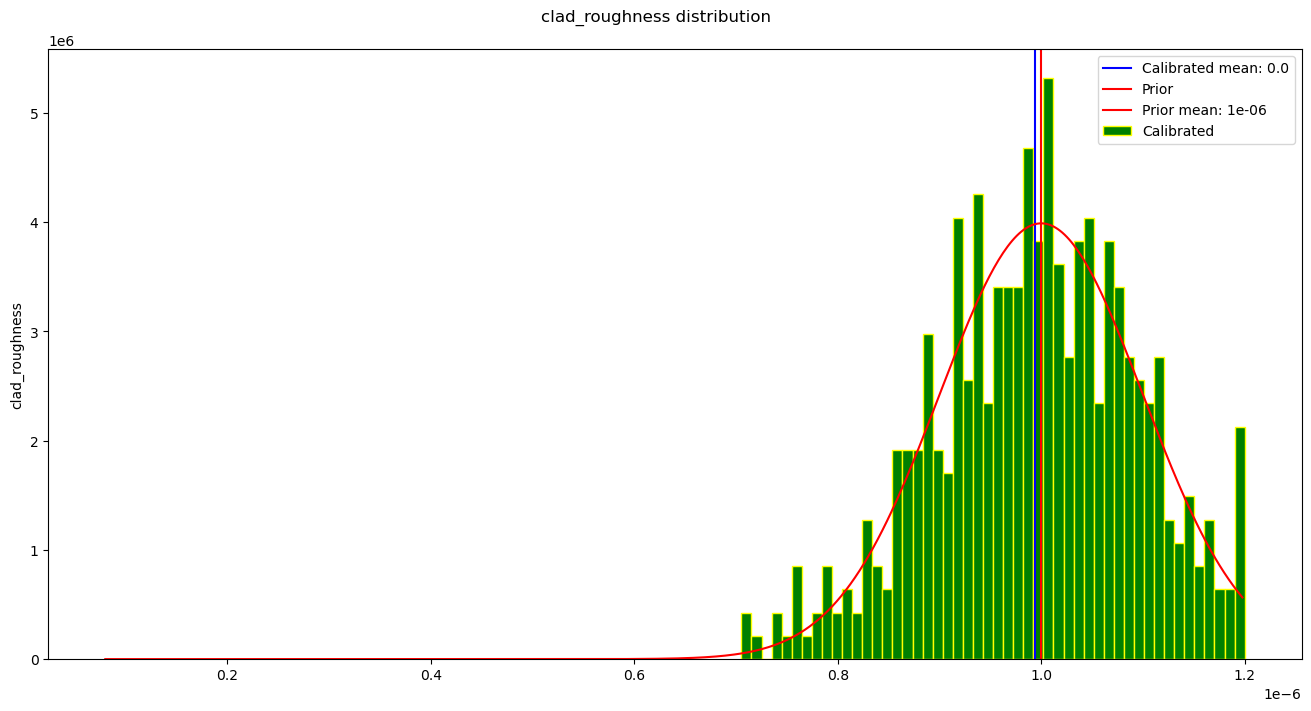

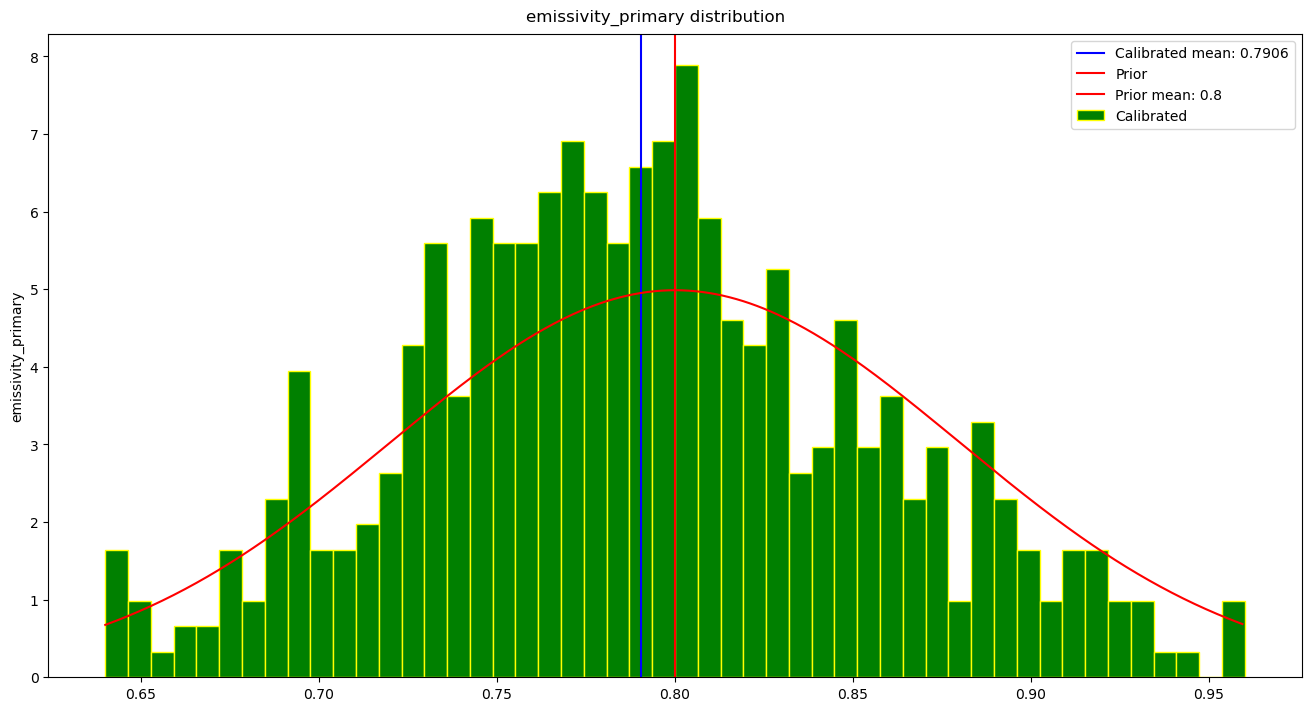

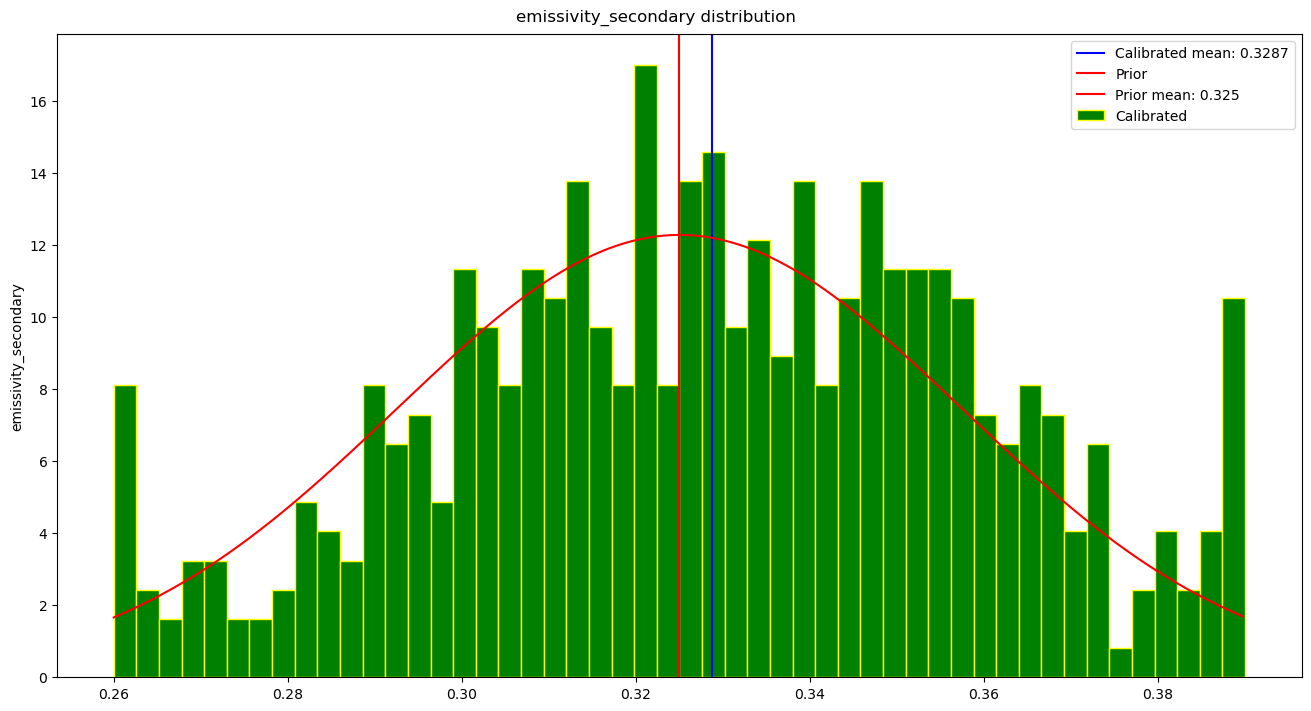

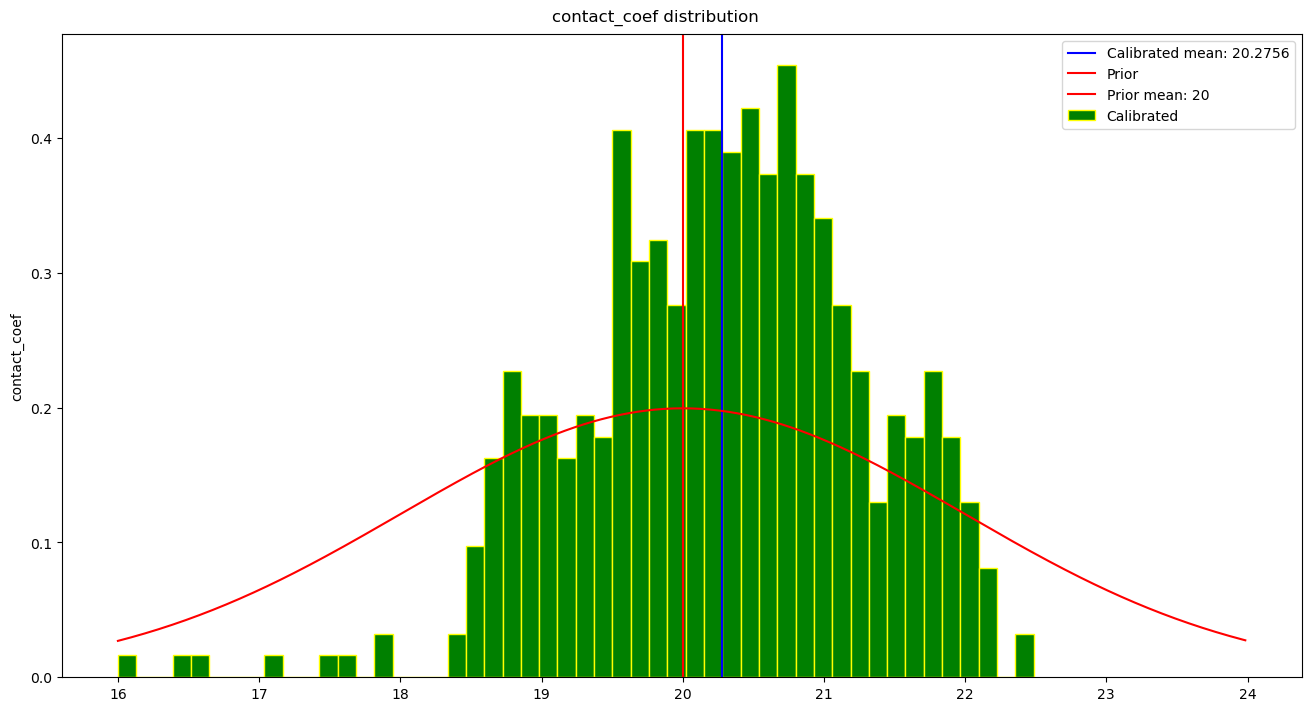

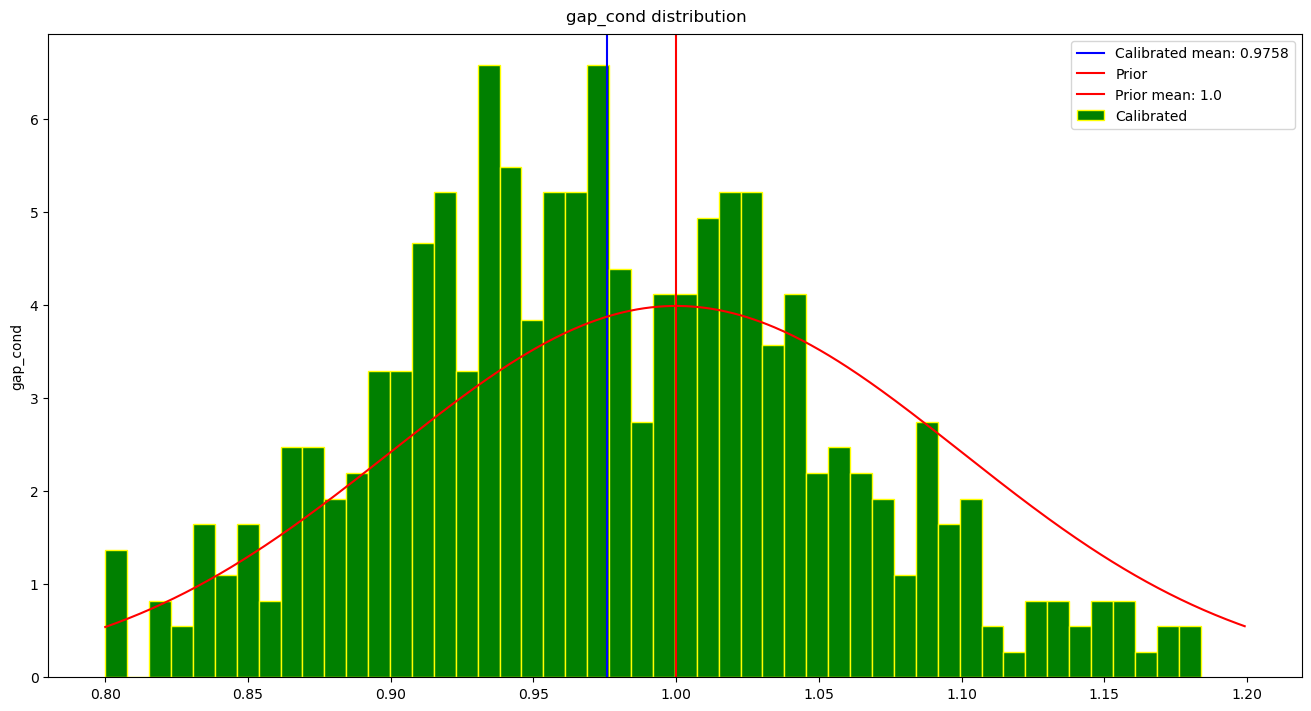

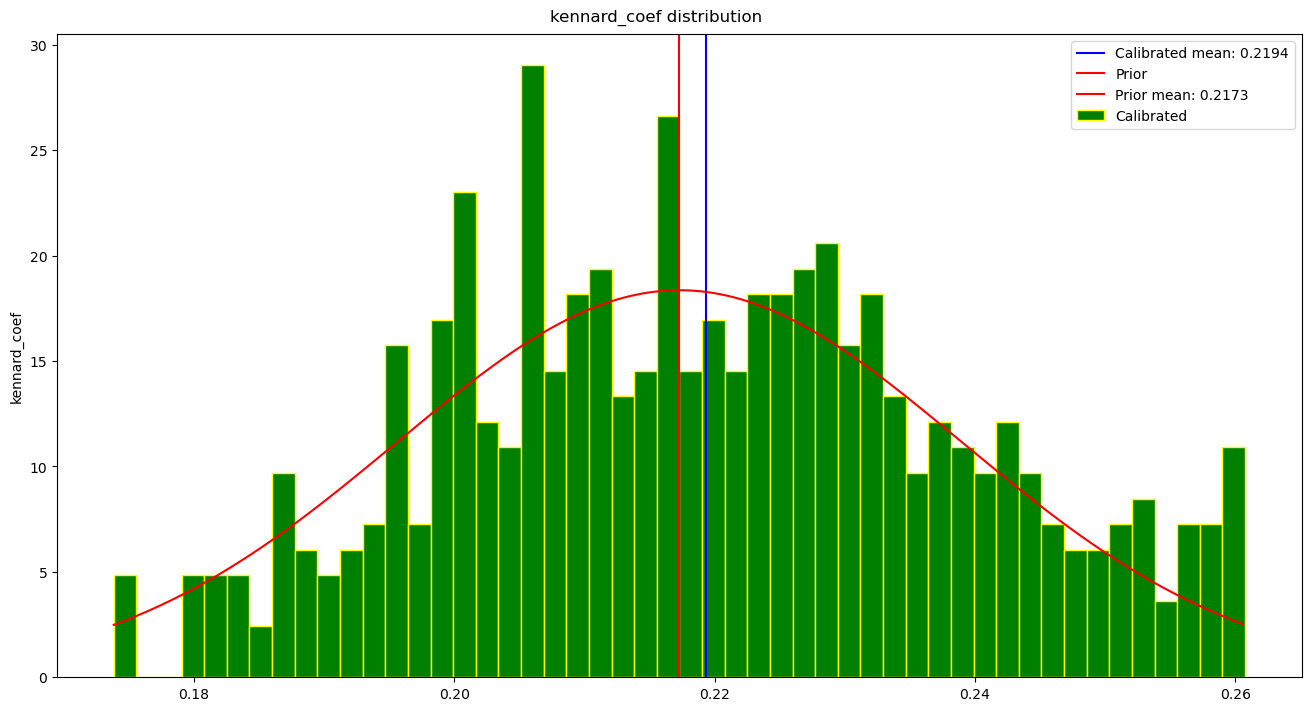

In [26]:
paramNames = ['pcf_scale', 'fuel_k_scale', 'fuel_cp_scale', 'clad_k_scale', 'clad_cp_scale', 
              'fuel_roughness', 'clad_roughness', 'emissivity_primary', 'emissivity_secondary', 
              'contact_coef', 'gap_cond', 'kennard_coef']
distDict ={'pcf_scale':[1.0, 0.1, 0.8, 1.2], 
           'fuel_k_scale':[1.0, 0.1, 0.8, 1.2], 
           'fuel_cp_scale':[1.0, 0.1, 0.8, 1.2],
           'clad_k_scale': [1.0, 0.1, 0.8, 1.2],
           'clad_cp_scale':[1.0, 0.1, 0.8, 1.2],
           'fuel_roughness':[2.0e-6, 2.0e-7, 1.6e-6, 2.4e-6],
           'clad_roughness':[1e-6, 1e-7, 0.8e-7, 1.2e-6],
           'emissivity_primary':[0.8, 0.08, 0.64, 0.96],
           'emissivity_secondary':[0.325, 0.0325, 0.26, 0.39], 
           'contact_coef':[20, 2, 16, 24], 
           'gap_cond':[1.0, 0.1, 0.8, 1.2], 
           'kennard_coef':[0.2173, 0.02173, 0.17384, 0.26076]
          }

for param in paramNames:
    mean, sd, lb, ub = distDict[param]
    d = (ub-lb)/500
    x = np.arange(lb, ub, d)
    y = st.norm.pdf(x, mean, sd)
    # plt.plot(x,y)
    
    plot_data(x, y, mean, df[param].to_numpy(), param)

# st.norm.pdf(x, mean, sd)

array([0.17384])